In [1]:
!conda install gdcm -c conda-forge -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdcm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    gdcm-2.8.9                 |   py37h5d359c0_2         3.4 MB  conda-forge
    libjpeg-turbo-2.1.0        |       h7f98852_0         987 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.7 MB

The following NEW packages will be INSTALLED:

  gdcm               conda-forge/linux-64::gdcm-2.8.9-py37h5d359c0_2
  libjpeg-turbo      conda-forge/linux-64::libjpeg-turbo-2.1.0-h7f98852_0

The following packages 

In [2]:
import os

from PIL import Image
import pandas as pd
from tqdm.auto import tqdm
import cv2 as cv
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

def read_xray(path, voi_lut = True, fix_monochrome = True):
    # Original from: https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to 
    # "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

In [4]:
def resize(array, size, keep_ratio=False, resample=Image.LANCZOS):
    # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image

    im = array 
    hist_im = cv.equalizeHist(im)
    im = Image.fromarray(hist_im)
    
    if keep_ratio:
        im.thumbnail((size, size), resample)
    else:
        im = im.resize((size, size), resample)
    return im

In [5]:
train = pd.read_csv('../input/siim-covid19-detection/train_image_level.csv')

In [6]:
path = '../input/siim-covid19-detection/train/ae3e63d94c13/288554eb6182/e00f9fe0cce5.dcm'
dicom = pydicom.read_file(path)

In [7]:
import csv
file = open('../input/siimdup/duplicates.csv' , "r")
csv_reader = csv.reader(file)

lists_from_csv = []
for row in csv_reader:
    lists_from_csv.append(row)

print(lists_from_csv)

[['6534a837497d_image', '74077a8e3b7c_image'], ['9e4824fcee2e_image', 'ea2117b53323_image'], ['19fc87ff0612_image', 'eea3a910fa9e_image'], ['1ea01196514a_image', '961e67cadcdc_image'], ['70fbcd6dcc53_image', '9b1de1c45491_image'], ['6494a03199e5_image', '3b6ad60071d4_image'], ['b61f3493c551_image', '089bd77c8c10_image'], ['0842f032a217_image', '830063223a31_image', 'efc93a3917b6_image'], ['c6e92e59a0ae_image', '05c063f5cef5_image', 'b121806162c3_image', '4c414b793562_image', '26f643772090_image', '156cb1f5c689_image', 'bee62c601ae9_image', 'a5a364383f34_image', '04cc2f7f4c4b_image'], ['c8156ae4d6e8_image', '7b7275d670e7_image'], ['93979c3e3177_image', '72cf260ddf4c_image'], ['00c1515729a8_image', '9e844dea386a_image'], ['b4b931e5ad31_image', '6ff218d10741_image'], ['7f1924880cf8_image', 'bb3076795a01_image'], ['32222cc776a2_image', '99f3642f50f5_image', 'b6b74c8a97e4_image'], ['d180fed57716_image', '12e97ed89297_image'], ['c05a1da5efe0_image', 'ab55abb953d1_image'], ['06f6423be3f9_imag

In [8]:
keep = ['74077a8e3b7c_image', '9e4824fcee2e_image', '19fc87ff0612_image', '961e67cadcdc_image', '70fbcd6dcc53_image', '6494a03199e5_image', '089bd77c8c10_image', 'b61f3493c551_image', '0842f032a217_image', '830063223a31_image', 'efc93a3917b6_image', '26f643772090_image', 'c8156ae4d6e8_image', '93979c3e3177_image', '9e844dea386a_image', 'b4b931e5ad31_image', 'bb3076795a01_image', 'b6b74c8a97e4_image', '12e97ed89297_image', 'd180fed57716_image', 'c05a1da5efe0_image', '06f6423be3f9_image', '2da1eb17b0b7_image', '9fa8318fb7f6_image', '66712e2fc6a4_image', 'ea516e218fe6_image', '7966f780f27f_image', '93301812b0e7_image', '1a0a148c030f_image', 'd93b8a8335cf_image', 'caa7fd25ee9d_image', 'd342f75ccb55_image', '1dc7459cb081_image', '63c6e1324ac3_image', '04f41a8958f7_image', '41e9a794b342_image', '0d4d6acc9ed3_image', 'fa447a409bd6_image', 'f7edf5c476c4_image', '893fde8abd42_image', 'ea2688741043_image', 'b43de320e7d9_image', 'ac212043ee3c_image', '6f5e70a99d77_image', 'c7925ab50eb0_image', '42f55c3da74f_image', 'abb96ea8a826_image', '7be323e5f816_image', '0c6b440ba98e_image', '19701de5ae89_image', '40e1d57e03be_image', '077c85f226d8_image', 'c64ddad4795a_image', 'f7c7683d6ed9_image', '32ebc75d961e_image', 'df565bcf3504_image', 'a0178e3a0d8f_image', '3e7b2ffc97db_image', '4bb94cd7f2f4_image', '61f3ac249c50_image', '847f48f57169_image', '172a7ed6d7e2_image', '84135cf828e7_image', '7e8966bfec61_image', '7b3e9f13d4e7_image', 'f208dc529d16_image', 'd74ef8961bff_image', 'a2ee4b862182_image', 'd787c9bd4fa8_image', '68ad4b624a6d_image', '2f6019c75d6d_image', 'b0866caa201a_image', '52f97cad2b63_image', 'cbf0a27f993e_image', '3566e20a178e_image', '9108cdfd43dc_image', '33c026e51b02_image', '1c1069c57757_image', 'a414f67f5735_image', '173c23887f9b_image' ]

In [9]:
remove = []
for i in lists_from_csv:
    for j in i:
        if j not in keep:
            remove.append(j)
#remove

In [10]:
print(len(keep), len(remove))

80 101


In [11]:
IMG_SIZE = 640
image_id = []
dim0 = []
dim1 = []
splits = []

tuples = []
for split in ['train', 'test']:
    save_dir = f'/kaggle/working/image/{split}/'

    os.makedirs(save_dir, exist_ok=True)

    for dirname, _, filenames in tqdm(os.walk(f'../input/siim-covid19-detection/{split}')):
        for file in filenames:
            tuples.append((file, dirname, save_dir, split))
import multiprocessing

def resize_and_save(t):
    file, dirname, save_dir, split = t
    # set keep_ratio=True to have original aspect ratio
    xray = read_xray(os.path.join(dirname, file))
    im = resize(xray, size=IMG_SIZE) 
#     print(os.path.join(dirname, file), os.path.join(save_dir, file.replace('dcm', 'png')))
    if (file[:-4] + '_image') in remove:
        pass
    else:
        im.save(os.path.join(save_dir, file[:-4] + '_image' + '.png'))

    image_id.append(file.replace('.dcm', '') + '_image')
    dim0.append(xray.shape[0])
    dim1.append(xray.shape[1])
    splits.append(split)


pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
# for t in tqdm(tuples):
for _ in tqdm(pool.imap_unordered(resize_and_save, tuples), total=len(tuples)):
    pass


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/7597 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handlers/numpy_handler.py:341: UserWarning: The length of the pixel data in the dataset (13262360 bytes) indicates it contains excess padding. 216296 bytes will be removed from the end of the data
  warnings.warn(msg)


In [ ]:
#tuples

In [ ]:
image_id = []
dim0 = []
dim1 = []
splits = []
for file, dirname, save_dir, split in tqdm(tuples):
    image_id.append(file.replace('.dcm', '') + '_image')
    xray = read_xray(os.path.join(dirname, file))
    dim0.append(xray.shape[0])
    dim1.append(xray.shape[1])
    splits.append(split)

In [12]:
%%time
!tar -zcf train.tar.gz -C "/kaggle/working/image/train/" .
!tar -zcf test.tar.gz -C "/kaggle/working/image/test/" .

CPU times: user 770 ms, sys: 128 ms, total: 898 ms
Wall time: 1min 2s


In [13]:
df = pd.DataFrame.from_dict({'image_id': image_id, 'dim0': dim0, 'dim1': dim1, 'split': splits})
df.to_csv('meta.csv', index=False)

In [14]:
from IPython.display import FileLink
FileLink(r'./train.tar.gz')

/kaggle/working/train.tar.gz

In [15]:
from IPython.display import FileLink
FileLink(r'./test.tar.gz')

/kaggle/working/test.tar.gz

  0%|          | 0/6334 [00:00<?, ?it/s]

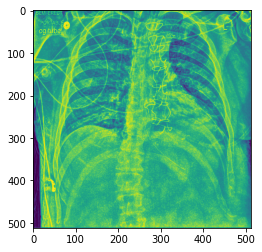

In [20]:
for i in tqdm(glob('../input/siimcovid19-512-img-png-600-study-png/image/*')):
    if i[-22:-4] == '0a990c89256a_image':
        im = cv.imread(i, 0)

In [15]:
im 
hist_im = cv.equalizeHist(im)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (15, 15)) # MORPH_ELLIPSE

tophat_img = cv.morphologyEx(hist_im, cv.MORPH_TOPHAT, kernel)
bothat_img = cv.morphologyEx(hist_im, cv.MORPH_BLACKHAT, kernel) # Black --> Bottom

im = hist_im + tophat_img - bothat_img
im = Image.fromarray(im)

array([[[ 27,  27,  27],
        [103, 103, 103],
        [ 96,  96,  96],
        ...,
        [138, 138, 138],
        [144, 144, 144],
        [178, 178, 178]],

       [[ 24,  24,  24],
        [101, 101, 101],
        [ 90,  90,  90],
        ...,
        [216, 216, 216],
        [217, 217, 217],
        [209, 209, 209]],

       [[ 27,  27,  27],
        [109, 109, 109],
        [ 93,  93,  93],
        ...,
        [246, 246, 246],
        [255, 255, 255],
        [240, 240, 240]],

       ...,

       [[ 12,  12,  12],
        [ 15,  15,  15],
        [  8,   8,   8],
        ...,
        [147, 147, 147],
        [146, 146, 146],
        [145, 145, 145]],

       [[ 14,  14,  14],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [174, 174, 174],
        [171, 171, 171],
        [158, 158, 158]],

       [[  7,   7,   7],
        [ 35,  35,  35],
        [ 35,  35,  35],
        ...,
        [ 73,  73,  73],
        [ 71,  71,  71],
        [ 74,  74,  74]]

In [21]:
hist_test = cv.equalizeHist(im)

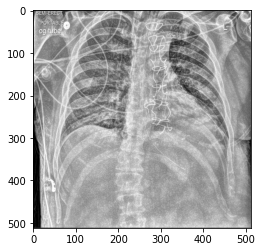

In [30]:
plt.imshow(im, cmap='gray')

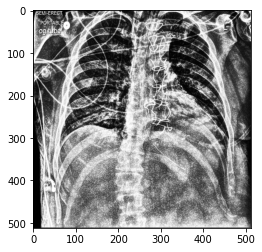

In [26]:
plt.imshow(hist_test, cmap='gray')

In [33]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (15, 15)) # MORPH_ELLIPSE

tophat_img = cv.morphologyEx(im, cv.MORPH_TOPHAT, kernel)
bothat_img = cv.morphologyEx(im, cv.MORPH_BLACKHAT, kernel) # Black --> Bottom

img = im + tophat_img - bothat_img

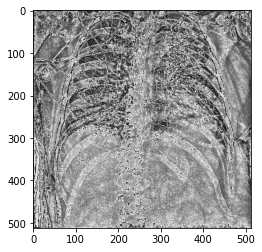

In [34]:
plt.imshow(img, cmap='gray')